In [ ]:
### Business Problem
Kurangnya persaingan AirBnB berdasarkan jumlah pengunjung
- Tripadvisor mempunyai 588juta pengunjung 
- Booking.com mempunyai 563 juta pengunjung
- AirBnB mempunyai 190 juta pengunjung

https://www.geckoroutes.com/travel-insights/most-popular-travel-booking-websites-apps/

In [ ]:
## Goals
- Melakukan Exploratory Data Analysis
- Menentukan lokasi properti yang banyak dipesan
- Menentukan tipe room yang paling banyak dipesan
- Memberikan rekomendasi strategi pemasaran berdasarkan analisis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Sumber data:
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

In [4]:
bnb = pd.read_csv('AB_NYC_2019.csv')
bnb

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Price_Category
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Budget
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Moderate
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,Budget
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Cheap
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,Cheap
48891,48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,Cheap
48892,48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,Budget
48893,48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,Cheap


In [5]:
bnb.drop(['last_review'], axis=1, inplace = True)
bnb.drop(['reviews_per_month'], axis=1, inplace = True)

In [1]:
bnb.isna().sum()

NameError: name 'bnb' is not defined

In [7]:
bnb.dropna(inplace = True)

In [8]:
bnb.isna().sum()

Unnamed: 0                        0
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
Price_Category                    0
dtype: int64

In [12]:
bnb =bnb.drop(columns='Unnamed: 0')

In [14]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 non-null  int64  
 12  calculated_host_listings_count  

In [15]:
def cek_outliers(df,col):
    Q1 = df[col].describe()['25%']
    Q3 = df[col].describe()['75%']
    IQR = Q3-Q1
    UF = Q3 + (1.5*IQR)
    LF = Q1 - (1.5*IQR)
    df_outliers = df[(df[col] < LF) | (df[col] > UF)]
    if len(df_outliers) == 0:
           return "No Outliers"
    else:
           return df_outliers

In [16]:
cek_outliers(bnb,'price')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Price_Category
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,1,180,Upscale
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,1,7,Luxury
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,2,243,Luxury
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,4,298,Upscale
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,2,216,Upscale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,1,364,Upscale
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,1,64,Luxury
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,1,23,Luxury
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,1,9,Upscale


In [18]:
bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Price_Category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,Budget
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,Moderate
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,Budget
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,Cheap
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,Cheap


In [9]:
bnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [26]:
(pd.crosstab(index=[bnb['neighbourhood_group'],bnb['neighbourhood']], columns='rata_review', values= bnb['number_of_reviews'], aggfunc='mean')).round(2).sort_values('rata_review', ascending=False).iloc[[0]]

,col_0,rata_review
neighbourhood_group,neighbourhood,
Staten Island,Silver Lake,118.5


In [ ]:
1. Daerah dengan rata-rata review terbanyak?
    - Staten Island(Silver Lake)

In [28]:
pd.crosstab(index=[bnb['neighbourhood_group'],bnb['room_type']], columns='jumlah_type_room', values= bnb['room_type'], aggfunc='count').iloc[[1,4,6,10,13]]

,col_0,jumlah_type_room
neighbourhood_group,room_type,
Bronx,Private room,652
Brooklyn,Private room,10123
Manhattan,Entire home/apt,13190
Queens,Private room,3370
Staten Island,Private room,188


In [ ]:
2. Pemesanan tipe kamar terbanyak di setiap daerah:
    - Bronx = Private room
    - Brooklyn = Enitre home/apt
    - Manhattan = Entire home/apt
    - Queens = Private room
    - Staten Island = Private room


In [29]:
def range_harga(x):
    if x <101:
        return 'Cheap'
    if x >100 and x < 201:
        return 'Budget'
    if x >200 and x < 301:
        return 'Moderate'
    if x >300 and x < 451:
        return 'Upscale'
    if x >450:
        return 'Luxury'

# Sumber: https://www.tripsavvy.com/new-york-city-hotel-rates-1613103

In [30]:
bnb['Price_Category'] = bnb['price'].apply(range_harga)
bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Price_Category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,Budget
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,Moderate
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,Budget
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,Cheap
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,Cheap


In [35]:
pd.crosstab(bnb['neighbourhood_group'],bnb['Price_Category']).iloc[[4]]

Price_Category,Budget,Cheap,Luxury,Moderate,Upscale
neighbourhood_group,,,,,
Staten Island,78,270,6,17,2


In [ ]:
3. Kategori dengan range harga apa memiliki pemesanan terbanyak di Staten Island?
insight: kategori cheap memilki pemesanan terbanyak

<img src="Untitled.JPG">

<img src="avgprice.JPG">

In [ ]:
4. Berapa rata-rata harga penginapan Air BnB dengan kategori Cheap?
- Di Bedford-Stuyvesant (Brooklyn) = $73.3
- Di Williamsburg (Brooklyn) = $85.8
- Di Harlem (Manhattan) = $82.0

In [ ]:
Rekomendasi:
    - Melakukan promosi dengan segmentasi lokasi pasar terbesar di Brooklyn,

In [36]:
bnb.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
id,1.000000,0.588221,-0.003116,0.091076,0.010564,-0.012038,-0.320020,0.133224,0.085616
host_id,0.588221,1.000000,0.020193,0.127198,0.015328,-0.017027,-0.140273,0.154954,0.203743
latitude,-0.003116,0.020193,1.000000,0.084819,0.033944,0.025893,-0.015198,0.019548,-0.010775
longitude,0.091076,0.127198,0.084819,1.000000,-0.149954,-0.062893,0.059151,-0.114746,0.082754
price,0.010564,0.015328,0.033944,-0.149954,1.000000,0.042804,-0.047949,0.057460,0.081817
minimum_nights,-0.012038,-0.017027,0.025893,-0.062893,0.042804,1.000000,-0.081610,0.131313,0.145953
number_of_reviews,-0.320020,-0.140273,-0.015198,0.059151,-0.047949,-0.081610,1.000000,-0.072408,0.171855
calculated_host_listings_count,0.133224,0.154954,0.019548,-0.114746,0.057460,0.131313,-0.072408,1.000000,0.225784
availability_365,0.085616,0.203743,-0.010775,0.082754,0.081817,0.145953,0.171855,0.225784,1.000000


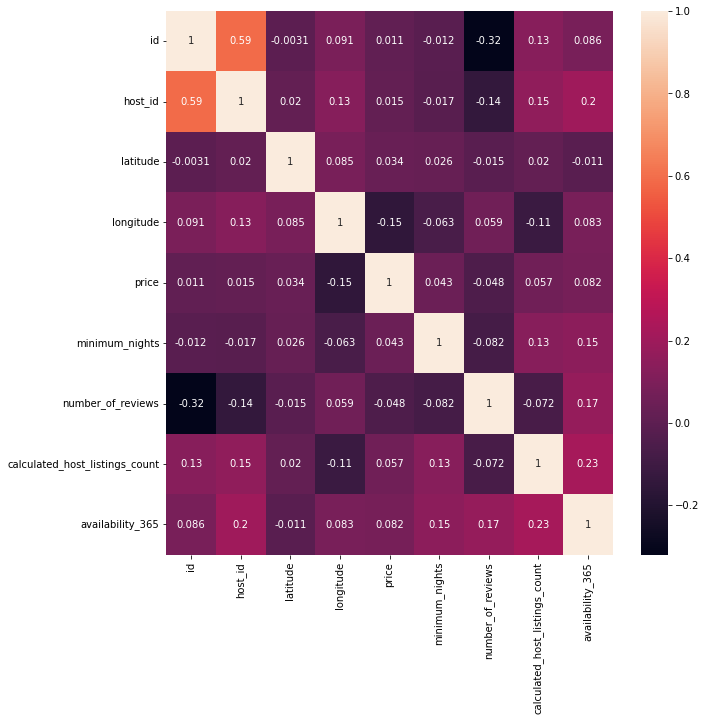

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(bnb.corr(),annot=True)
plt.show()